In [79]:
#Libraries and Requirements
import pandas as pd
import numpy as np
import datetime
import random
from nltk import tokenize
from operator import itemgetter
import math
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
!pip install geopandas
!pip install descartes
import geopandas as gpd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:

get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('seaborn')

In [159]:
crime_1 = pd.read_csv('/content/Crime1.csv',error_bad_lines=False)

In [162]:
crime_2 = pd.read_csv('/content/Crime2.csv',error_bad_lines=False)

In [161]:
crime_3 = pd.read_csv('/content/Crime3.csv',error_bad_lines=False)

In [163]:
crime=pd.concat([crime_1,crime_2,crime_3],ignore_index=True)

In [165]:
crime.dropna(subset = ["event_id"], inplace=True)

In [166]:
crime.drop(crime[crime['district_code'] == 'district_code'].index, inplace = True) 

In [167]:
crime.head()

,event_id,start_time,event_maintype,priority,district_code,locality,place_name,closure_reason,closure_comments,last_update_time,closure_ws_userid,closure_time,near_ps,near_fire_station,near_hospital,addl_info,Unnamed: 16
0,116190,2020-04-01 00:03:40.583,CRIME AGAINST WOMEN,EMERGENCY,Malappuram,NaN,"Chelari, Chelari, Kerala 673635, India",SERVICE DELIVERED,Thenhipalam police called the caller. the call...,2020-04-01 00:05:01.669,azeem,2020-04-01 01:09:36.811,Thenhipalam Ps,NaN,NaN,dispute between husband and wife and he is hur...,NaN
10,116191,2020-04-01 00:06:44.307,OTHERS,HIGH,Thrissur,NaN,NaN,SERVICE DELIVERED,"kattur ERU attend the event,call is not connec...",2020-04-01 00:08:58.077,azeem,2020-04-01 01:09:56.816,NaN,NaN,NaN,caller informed that suspecious sound from cal...,NaN
18,116192,2020-04-01 00:21:21.499,OTHERS,HIGH,Thrissur,NaN,"Moyalan Creamics, Konikkara, Thrissur, Kerala ...",SERVICE DELIVERED,event sent to Ollur ps MDT.POLICE REACHED SOLV...,2020-04-01 00:23:42.565,azeem,2020-04-01 06:51:08.577,Ollur Ps,NaN,Esi Hospital,Caller informed two north indians treaspass in...,NaN
22,116193,2020-04-01 00:22:22.236,OTHERS,MEDIUM,Thrissur,NaN,"Mapranam Block Rd, Porathissery, Kerala 680712...",SERVICE DELIVERED,"irinjalakuda ERU reached the spot,nothing to ...",2020-04-01 00:23:44.188,azeem,2020-04-01 01:10:09.843,Irinjalakuda Ps,NaN,Lal Memorial Hospital Mapranam,"gambling loc: mapranam block office back side,...",NaN
29,116194,2020-04-01 01:01:40.984,OTHERS,EMERGENCY,Thiruvananthapuram,NaN,"BSRA K-34, Kakkode lane, Velakudi, Thiruvanant...",SERVICE DELIVERED,pettah ps reached the spot and no person and n...,2020-04-01 01:03:34.322,azeem,2020-04-01 07:55:22.048,Petta Ps,Chacka fire station,Veterinary Hospital Pettah,2 persons jump inside of her compound petta bh...,NaN


In [168]:
crime.shape

(800, 17)

In [169]:
crime.groupby([crime['district_code']]).size().sort_values(ascending=False)

district_code
Thiruvananthapuram    182
Kollam                134
Ernakulam              88
Alappuzha              71
Kozhikode              51
Thrissur               46
Malappuram             37
Palakkad               36
Kottayam               32
Kannur                 32
Pathanamthitta         20
Idukki                 16
Wayanad                 8
Kasaragod               7
dtype: int64

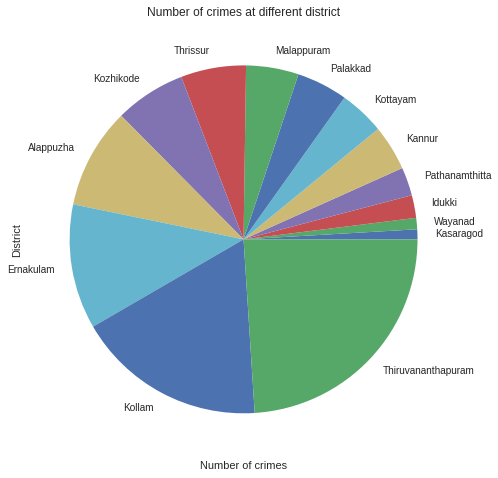

In [242]:
plt.figure(figsize=(8,8))
crime.groupby([crime['district_code']]).size().sort_values(ascending=True).plot(kind='pie', style='dark')
plt.title('Number of crimes at different district')
plt.ylabel('District')
plt.xlabel('Number of crimes')
plt.show()

In [171]:
crime.groupby([crime['event_maintype']]).size().sort_values(ascending=True)

event_maintype
HEART ATTACK                 1
INTER HOSPITAL TRANSFER      1
GAS LEAKAGE                  1
WATER RESCUE                 1
BLEEDING                     1
BUILDING FIRE                1
FLOOD                        2
BREATHING DIFFICULTIES       2
THREAT                       2
THEFT                        3
MISSING                      4
NIZHAL PANIC CALL            5
FIRE                         7
PERSON COLLAPSED             8
ACCIDENT                    18
FOOD SUPPLY                 24
CRIME AGAINST WOMEN         37
MEDICAL SUPPLY              50
OTHERS                     624
dtype: int64

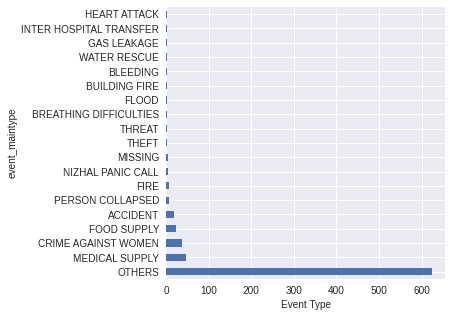

In [249]:
plt.figure(figsize=(5,5))
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Event Type', fontsize=10)
crimeType = crime.groupby([crime['event_maintype']]).size().sort_values(ascending=False).plot(kind='barh', style='seaborn-paper')

In [173]:
crime.groupby([crime['priority']]).size().sort_values(ascending=False)

priority
EMERGENCY    440
HIGH         295
MEDIUM        16
LOW            1
dtype: int64

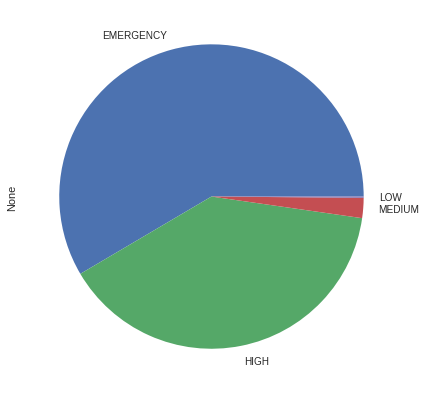

In [253]:
plt.figure(figsize=(7,7))
crimeType = crime.groupby([crime['priority']]).size().sort_values(ascending=False).plot(kind='pie', style='seaborn-paper')

In [175]:
crime.dropna(subset = ["addl_info"], inplace=True)

In [176]:
crime.dropna(subset = ["event_maintype"], inplace=True)

In [177]:
crime.isna().sum()

event_id               0
start_time             0
event_maintype         0
priority              39
district_code         29
locality             783
place_name            52
closure_reason         0
closure_comments       0
last_update_time       0
closure_ws_userid      0
closure_time           0
near_ps              257
near_fire_station    681
near_hospital        163
addl_info              0
Unnamed: 16          788
dtype: int64

In [178]:
crime_temp=crime.copy()

In [180]:
X = crime[crime['event_maintype'] != "OTHERS"] 

In [181]:
X_Others = crime[crime['event_maintype'] == "OTHERS"]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [182]:
X_train=X.addl_info
Y_train=X.event_maintype
X_test=X_Others.addl_info

In [184]:
cvec=CountVectorizer()
cvec= CountVectorizer(stop_words='english').fit(X_train)
df_train =pd.DataFrame(cvec.transform(X_train).todense(),columns=cvec.get_feature_names())
df_test =pd.DataFrame(cvec.transform(X_test).todense(),columns=cvec.get_feature_names())


In [185]:
lr=LogisticRegression()
lr.fit(df_train,Y_train)
Y_pred=lr.predict(df_test)

In [192]:
Y_pred

array(['CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY',
       'MEDICAL SUPPLY', 'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'MEDICAL SUPPLY', 'CRIME AGAINST WOMEN', 'ACCIDENT',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'ACCIDENT',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'ACCIDENT', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'FOOD SUPPLY', 'MEDICAL SUPPLY',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY', 'ACCIDENT',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME 

In [186]:
X_train_comments=X.closure_comments
Y_train_comments=X.event_maintype
X_test_comments=X_Others.closure_comments
cvec= CountVectorizer(stop_words='english').fit(X_train_comments)
df_train_comments =pd.DataFrame(cvec.transform(X_train_comments).todense(),columns=cvec.get_feature_names())
df_test_comments =pd.DataFrame(cvec.transform(X_test_comments).todense(),columns=cvec.get_feature_names())
lr=LogisticRegression()
lr.fit(df_train_comments,Y_train_comments)
Y_pred_comments=lr.predict(df_test_comments)


In [187]:
Y_pred_comments

array(['CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'ACCIDENT',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'ACCIDENT',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'FOOD SUPPLY',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'FOOD SUPPLY',
       'CRIME AGAINST WOMEN', 'FOOD SUPPLY', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'ACCIDENT', 'CRIME AGAINST WOMEN',
       'CRIME AGAI

In [188]:
train=pd.concat([df_train,df_train_comments],axis=1)
test=pd.concat([df_test,df_test_comments],axis=1)

In [193]:
lr=LogisticRegression()
lr.fit(train,Y_train)
Y_predicted=lr.predict(test)
Y_predicted

array(['CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'MEDICAL SUPPLY', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN', 'ACCIDENT',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'ACCIDENT', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'FOOD SUPPLY', 'CRIME AGAINST WOMEN',
       'FOOD SUPPLY', 'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'CRIME AGAINST WOMEN', 'CRIME AGAINST WOMEN',
       'C

In [194]:
import collections
elements_count = collections.Counter(Y_predicted)
# printing the element and the frequency 
for key, value in elements_count.items():
   print(f"{key}: {value}")

CRIME AGAINST WOMEN: 462
MEDICAL SUPPLY: 52
ACCIDENT: 69
FOOD SUPPLY: 21
PERSON COLLAPSED: 14
FIRE: 4
NIZHAL PANIC CALL: 1
THEFT: 1


<BarContainer object of 8 artists>

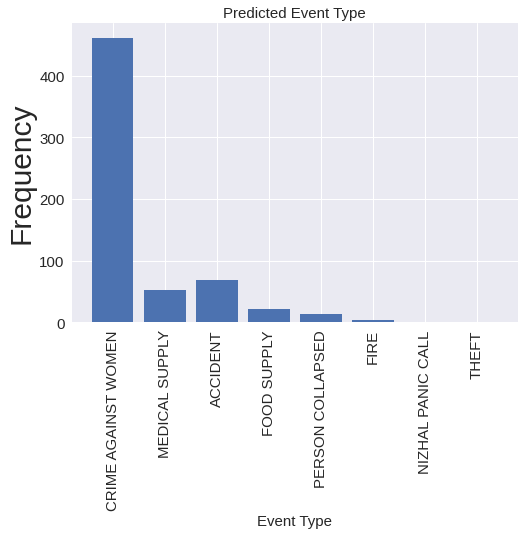

In [254]:
Event_type = elements_count.keys()
Frequency = elements_count.values()
plt.title("Predicted Event Type",fontsize=15)
plt.xlabel("Event Type",fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel("Frequency",fontsize=30)
plt.yticks(fontsize=15)
plt.bar(Event_type,Frequency)


In [196]:
crime_temp=crime.copy()

In [197]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
from collections import defaultdict
import seaborn as sns
from collections import  Counter

In [200]:
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [255]:
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='yellow',
        stopwords=set(STOPWORDS),
        max_words=80,
        max_font_size=25, 
        scale=3,
        random_state=2)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()


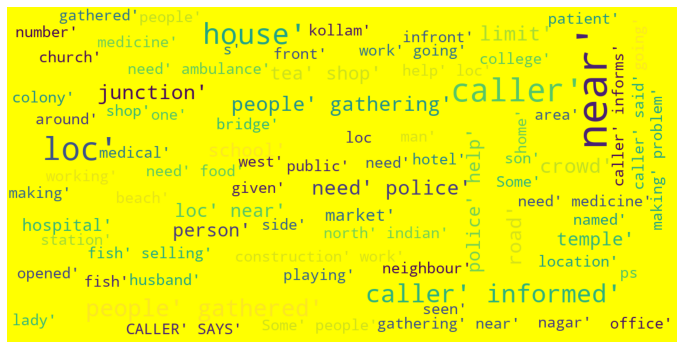

In [256]:
plot_wordcloud(crime['addl_info'])

,freq,Clusters
district_code,,
Kollam,134,1
Kannur,32,2
Kottayam,32,2
Malappuram,37,2
Palakkad,36,2
Thiruvananthapuram,182,3
Alappuzha,71,4
Ernakulam,88,4
Kozhikode,50,0


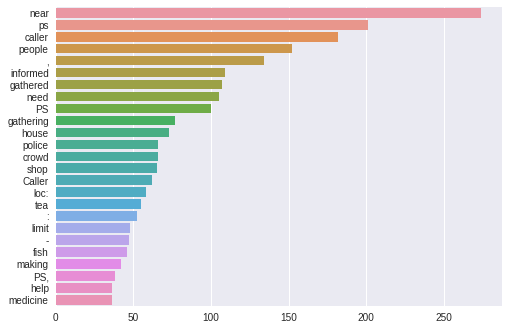

In [259]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
plot_top_non_stopwords_barchart(crime['addl_info'])
district_wise=crime.groupby('district_code')[['district_code']].count()
district_wise.columns.values[0] = 'freq'
district_wise
import seaborn as sns
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
loc=district_wise
loc=std.fit_transform(loc)
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(loc)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(loc, labels, metric='euclidean'))
    wcss.append(clf.inertia_)
clf_final=KMeans(n_clusters=6,init='k-means++',random_state=50)
clf_final.fit(loc)
district_wise["Clusters"]=clf_final.predict(loc)
cluster_summary=pd.concat([district_wise[district_wise["Clusters"]==1],district_wise[district_wise["Clusters"]==2],district_wise[district_wise["Clusters"]==3],district_wise[district_wise["Clusters"]==4],district_wise[district_wise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='BuGn')


In [80]:
#Functions to perform Transformation for data Pre-Processing
def function1(lis):
    list1 = []
    for i in lis:
        if i[0]!="event_id":
            if i[0]=='nan' and i[1]=='nan':# Skiping blank lines from the sheet
                continue
            else:
                list1.append(i)
    list2 = function2(list1) # send list to combine signal and disconnect rows
    return list2

def function2(ls1):
    i=0
    list2 = []
    while i < len(list1):
        if list1[i][0]!='nan':
            nw = list1[i]
            i+=2 # skip the title row (signal,disconnect)
            signal = []
            disconnect = []
            while list1[i][0]=='nan': # appending all signal and disconnect data as list and appending to 
                signal.append(list1[i][1])
                disconnect.append(list1[i][2])
                i+=1
                if(i==len(list1)): #safety net
                    break
            nw.append(signal)
            nw.append(disconnect)
            list2.append(nw) #Appending df to combined list
        else:
            i+=1    
    return list2 #one list with all data and corresponding signal time and disconnect cause as list of list

In [81]:
data = []
for i in range(1,4):
  df1 = pd.read_excel("/content/Crime Prediction 1.xlsx", header=0,sheet_name=str(i))
  df = df1.iloc[:,0:16]
  df = df.replace(np.nan,'nan', regex=True)
  lis = df.values.tolist()
  list1 = transform1(lis)
  for item in list1:
    data.append(item)
print("total number of Entries after data preprocessing: ",len(data))

total number of Entries after data preprocessing:  801


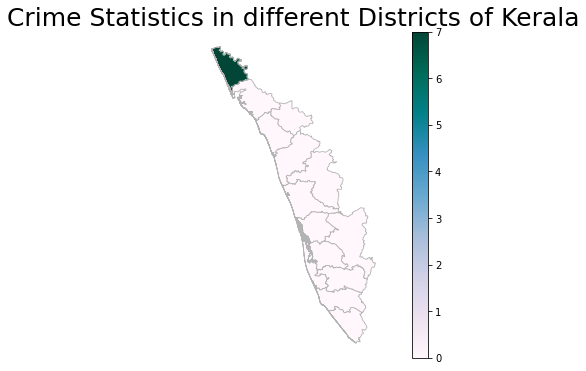

In [82]:
count = {}
for i in data:
  if i[4] not in count:
    count[i[4]] = 1
  else:
    count[i[4]] +=1
lis = []
for i in count.keys():
  if(i=="nan"):
    continue
  t = []
  t.append(i)
  t.append(count[i])
  lis.append(temp)
district_wise=pd.DataFrame(lis)
fp = "/content/drive/MyDrive/IND_adm/IND_adm2.shp"
map_df = gpd.read_file(fp)
map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
map_df = map_df[map_df['NAME_1']=='Kerala']
merged = map_df.set_index('NAME_2').join(district_wise.set_index(0))
merged[1].fillna(0, inplace=True)
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crime Statistics in different Districts of Kerala', fontdict={'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged.plot(column=1, cmap='PuBuGn', linewidth=0.8, ax=ax, edgecolor='0.7',legend=True)

In [83]:
def parse_time(text):
  seperation = '.'
  stripped = text.split(seperation, 1)[0]
  return stripped

def convert_time(date_time1,date_time2):
  string1 = date_time1.split('.',1)[0]
  string2 = date_time2.split('.',1)[0]
  #print(string1)
  #print(string2)

  format = "%Y-%m-%d %H:%M:%S"
  datetime_str1 = datetime.datetime.strptime(string1, format)
  datetime_str2 = datetime.datetime.strptime(string2, format)
  time = str(datetime_str2 - datetime_str1)
  return sum(x * int(t) for x, t in zip([60, 1, 1/60], time.split(":")))


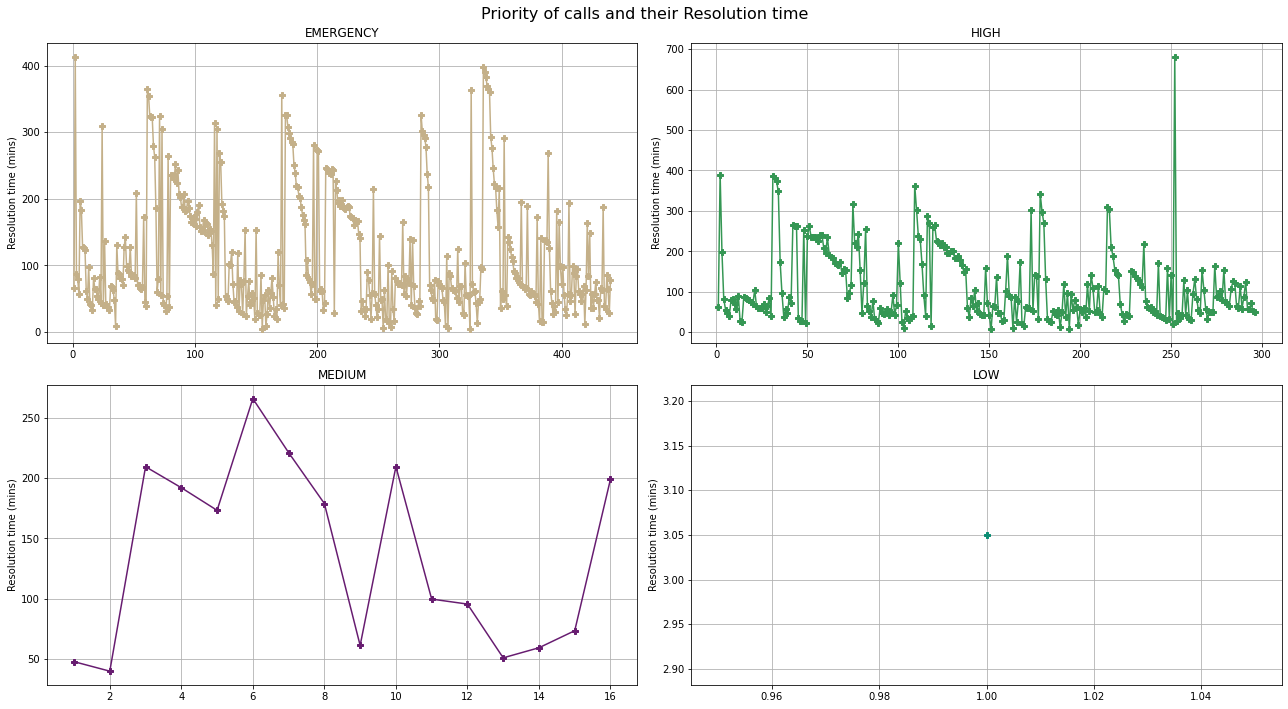

In [86]:
dic = {}
for i in data:
  if i[3]=='nan':
    continue
  if(i[3] in dic.keys()):
    dic[i[3]].append(convert_time(i[1],i[11]))
  else:
    dic[i[3]] = [convert_time(i[1],i[11])]

fig = plt.figure(figsize=(18, 10))
fig.suptitle('Priority of calls and their Resolution time',fontsize=16)
fig.subplots_adjust(hspace = .3, wspace=.001)
for key,it in zip(dic,range(1,5)):
  index = []
  for i in range(1,len(dic[key])+1):
    index.append(i)
  r,b,g = random.random(),random.random(),random.random()
  color = (r, g, b)
  ax = fig.add_subplot(2,2,it)
  ax.plot(index,dic[key], color=color,marker='P')
  ax.set_title(key)
  ax.set_ylabel('Resolution time (mins)')
  ax.grid(True)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [88]:
#Using NLTK to find Top Keywords based on caller comments
string = ""
for i in data:
  if(i[2]=="OTHERS"):
    string += str(i[15])
string = string.strip('\n')
stops = ["caller","informed","callers","PS",'ps','loc:','PS,','!','@','#','$','%','^','&','*','-','_',':',";",',','.','loc;','SAYS','IN','fish']
stop_words = set(stopwords.words('english'))
for i in stops:
  stop_words.add(i)
total_words = string.split()
total_word_length = len(total_words)
total_sentences = tokenize.sent_tokenize(string)
total_sent_len = len(total_sentences)
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

keywords = get_top_n(tf_idf_score,5)
print("Top Keywords are:")
for key in keywords.keys():
  print(key)

Top Keywords are:
gathered
near
people
gathering
shop


In [230]:
#Event type and their Disconnect causes(i.e. NORMAL_DISCONNECTION, MISSED_CALL, REASON_UNKNOWN)
disconnect = {}
#Populate Disconnect dictionary
for i in data:
  if(i[2]=="nan"):
    continue
  elif(i[2]=="OTHERS"):
    string = str(i[15])
    string = string.lower()
    if("gather" in string or "crowd" in string):
        disconnect["CROWD GATHERING"] = [0,0,0]
    else:
        disconnect["OTHERS"] = [0,0,0]
  else:
    disconnect[i[2]] = [0,0,0]

#Function to accumalte value in disconnect
def accumulate(ls,type):
  for j in ls:
    if(j=="NORMAL_DISCONNECTION"):
      disconnect[type][0] +=1
    elif(j=="MISSED_CALL"):
      disconnect[type][1] +=1
    else:
      disconnect[type][2] +=1

for i in data:
  if(i[2]=="nan"):
    continue
  elif(i[2]=="OTHERS"):
    string = str(i[15])
    string = string.lower()
    if("gather" in string or "crowd" in string):
      accumulate(i[17],"CROWD GATHERING")
    else:
      accumulate(i[17],"OTHERS")
  else:
    accumulate(i[17],i[2])

In [231]:
#Visualize the table
tab=[]
rowL=[]
colL = ["NORMAL DISCONNECTION","MISSED CALL","REASON UNKNOWN"]
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rowL)+1))
colors = colors[::-1]
for i in disconnect.keys():
  total = 0
  for k in disconnect[i]:
    total+= k
  lt = disconnect[i]
  lt = [f'{x/total*100:1.2f}' for x in lt]
  lt.insert(0,i)
  tab.append(lt)
  rowL.append(i)
from prettytable import PrettyTable
table = PrettyTable()
table.title = 'Event and their Call disconnections (%)'
table.field_names = ["Events \ Call types","NORMAL DISCONNECTION","MISSED CALL","REASON UNKNOWN"]
for i in tab:
  table.add_row(i)
print(table)

+-------------------------------------------------------------------------------+
|                    Event and their Call disconnections (%)                    |
+-------------------------+----------------------+-------------+----------------+
|   Events \ Call types   | NORMAL DISCONNECTION | MISSED CALL | REASON UNKNOWN |
+-------------------------+----------------------+-------------+----------------+
|   CRIME AGAINST WOMEN   |        52.82         |    20.00    |     27.18      |
|          OTHERS         |        62.98         |    16.03    |     20.99      |
|    NIZHAL PANIC CALL    |        75.00         |     0.00    |     25.00      |
|         MISSING         |        46.88         |    40.62    |     12.50      |
|     CROWD GATHERING     |        64.27         |    15.00    |     20.73      |
|     PERSON COLLAPSED    |        70.00         |    25.00    |      5.00      |
|         ACCIDENT        |        75.41         |    11.48    |     13.11      |
|       WATER RE

In [232]:
def check_slot(time):
  string1 = parse_time(time)
  format = "%Y-%m-%d %H:%M:%S"
  datetime_str1 = datetime.datetime.strptime(string1, format)
  tmp = str(datetime_str1)
  tmp = tmp.split(" ",1)[1]
  mins = sum(x * int(t) for x, t in zip([60, 1, 1/60], tmp.split(":")))
  if(mins<240):
    return "slot1"
  elif(240<=mins<480):
    return "slot2"
  elif(480<=mins<720):
    return "slot3"
  elif(720<=mins<960):
    return "slot4"
  elif(960<=mins<1200):
    return "slot5"
  else:
    return "slot6"

lis = []
for i in data:
  tmp = []
  tmp.append(check_slot(i[1]))
  tmp.append(i[4])
  if(i[2]=="nan"):
    continue
  elif(i[2]=="OTHERS"):
    string = str(i[15])
    string = string.lower()
    if("gather" in string or "crowd" in string):
        tmp.append("Crowd Gathering")
    else:
        tmp.append("Others")
  else:
    tmp.append(i[2])
  lis.append(tmp)

In [234]:
#Using Logistic Regression for Classification
reg = pd.DataFrame(lis)
ord_enc = OrdinalEncoder()
reg["time"] = ord_enc.fit_transform(reg[[0]])
reg["district"] = ord_enc.fit_transform(reg[[1]])
reg["crime"] = ord_enc.fit_transform(reg[[2]])

x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values

xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.35, random_state = 3)
 
classifier1 = LogisticRegression(random_state = 3,solver='lbfgs',max_iter=100000)
classifier1.fit(xtrain, ytrain)
y_pred = classifier1.predict(xtest)

print ("Accuracy using lbfgs solver: ",accuracy_score(ytest, y_pred))

classifier2 = LogisticRegression(random_state = 3,solver='saga',max_iter=100000)
classifier2.fit(xtrain, ytrain)
y_pred = classifier2.predict(xtest)

print ("Accuracy using saga solver: ",accuracy_score(ytest, y_pred))

Accuracy using lbfgs solver:  0.4172661870503597
Accuracy using saga solver:  0.4172661870503597


In [229]:
#Using SVM
x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.20, random_state = 2)
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain, ytrain)
y_pred = svclassifier.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00        59
         6.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         7
        12.0       0.00      0.00      0.00        13
        14.0       0.00      0.00      0.00         1
        15.0       0.40      1.00      0.57        63
        16.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         1

    accuracy                           0.40       159
   macro avg       0.03      0.08      0.05       159
weighted avg       0.16      0.40      0.22       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
#Using Deep Learning for Classification
x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.20, random_state = 2)
model = Sequential()
model.add(Dense(10, input_dim=xtrain.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=60, batch_size=22, verbose=2)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print('Accuracy: %.2f using Deep Learning' % (accuracy*100))

Epoch 1/60
29/29 - 0s - loss: 27.8685 - accuracy: 0.0237
Epoch 2/60
29/29 - 0s - loss: 10.9586 - accuracy: 0.0221
Epoch 3/60
29/29 - 0s - loss: -4.3711e+00 - accuracy: 0.0126
Epoch 4/60
29/29 - 0s - loss: -1.8542e+01 - accuracy: 0.0095
Epoch 5/60
29/29 - 0s - loss: -3.2426e+01 - accuracy: 0.0079
Epoch 6/60
29/29 - 0s - loss: -4.6589e+01 - accuracy: 0.0016
Epoch 7/60
29/29 - 0s - loss: -6.1259e+01 - accuracy: 0.0000e+00
Epoch 8/60
29/29 - 0s - loss: -7.7029e+01 - accuracy: 0.0000e+00
Epoch 9/60
29/29 - 0s - loss: -9.3739e+01 - accuracy: 0.0000e+00
Epoch 10/60
29/29 - 0s - loss: -1.1214e+02 - accuracy: 0.0000e+00
Epoch 11/60
29/29 - 0s - loss: -1.3211e+02 - accuracy: 0.0000e+00
Epoch 12/60
29/29 - 0s - loss: -1.5406e+02 - accuracy: 0.0000e+00
Epoch 13/60
29/29 - 0s - loss: -1.7842e+02 - accuracy: 0.0000e+00
Epoch 14/60
29/29 - 0s - loss: -2.0563e+02 - accuracy: 0.0000e+00
Epoch 15/60
29/29 - 0s - loss: -2.3579e+02 - accuracy: 0.0000e+00
Epoch 16/60
29/29 - 0s - loss: -2.6812e+02 - accura

In [227]:
#Lets use Dummy Variables to encode and see if we can increase the Accuracy
df1 = pd.get_dummies(reg,columns=["time","district"])
df1.head()

,0,1,2,crime,time_0.0,time_1.0,time_2.0,district_0.0,district_1.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,district_14.0
0,slot1,Malappuram,CRIME AGAINST WOMEN,4.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,slot1,Thrissur,Others,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,slot1,Thrissur,Others,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,slot1,Thrissur,Others,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,slot1,Thiruvananthapuram,Others,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [226]:
#Using Dummy variables in Logistic Regression
x = df1.iloc[:,4:21].values 
y = df1.iloc[:, 3].values
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.35, random_state = 3)
 
classifier1 = LogisticRegression(random_state = 3,solver='lbfgs',max_iter=100000)
classifier1.fit(xtrain, ytrain)
y_pred = classifier1.predict(xtest)
print ("Accuracy using lbfgs solver: ",accuracy_score(ytest, y_pred))

classifier2 = LogisticRegression(random_state = 3,solver='saga',max_iter=100000)
classifier2.fit(xtrain, ytrain)
y_pred = classifier2.predict(xtest)
print ("Accuracy using saga solver: ",accuracy_score(ytest, y_pred))

Accuracy using lbfgs solver:  0.4856115107913669
Accuracy using saga solver:  0.49280575539568344


In [224]:
#Using Dummy variables in SVM
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.35, random_state = 3)
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain, ytrain)
y_pred = svclassifier.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00        15
         5.0       0.36      0.58      0.45       101
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00        15
        13.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         2
        15.0       0.48      0.45      0.47       121
        16.0       0.00      0.00      0.00         4
        17.0       0.00      0.00      0.00         1
        19.0       0.00      0.00      0.00         1

    accuracy                           0.41       278
   macro avg       0.06      0.08      0.07       278
weighted avg       0.34      0.41      0.37       278



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
#Using K-Nearest neighbor
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)

In [221]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [222]:
y_pred = classifier.predict(xtest)

In [223]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[ 0  0  2  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  5  0  0  0  0  0  0 10  0  0  0]
 [ 0  0 67  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  3  0  0  0 10  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0 57  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00        15
         5.0       0.47      0.66      0.55       101
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         9
        12.0       1.00      0.67      0.80        15
        13.0       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler #pre-processoring
x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.35, random_state = 3)
mlp = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=3)
mlp.fit(xtrain, ytrain)
print(print(mlp.score(xtest, ytest)))

0.39928057553956836
None


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
